In [5]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import datetime

# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    file = "turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = file.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

week_nums = [160806, 160813, 160820, 160827]
df = get_data(week_nums)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

df.head(25)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844
5,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,20:00:00,REGULAR,5761524,1953886
6,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,00:00:00,REGULAR,5761691,1953917
7,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,04:00:00,REGULAR,5761733,1953925
8,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,08:00:00,REGULAR,5761748,1953944
9,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,12:00:00,REGULAR,5761841,1954030


In [6]:
df.rename(columns=lambda x: x.strip(), inplace="TRUE")

In [7]:
df['datetime'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format="%m/%d/%Y %H:%M:%S")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00


In [8]:
df['day'] = df['datetime'].dt.dayofweek
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5


In [9]:
df['d_entries']= df['ENTRIES'].shift(-1) - df['ENTRIES']
df['d_exits']= df['EXITS'].shift(-1) - df['EXITS']
df.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,20:00:00,REGULAR,5761524,1953886,2016-07-30 20:00:00,5,167.0,31.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,00:00:00,REGULAR,5761691,1953917,2016-07-31 00:00:00,6,42.0,8.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,04:00:00,REGULAR,5761733,1953925,2016-07-31 04:00:00,6,15.0,19.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,08:00:00,REGULAR,5761748,1953944,2016-07-31 08:00:00,6,93.0,86.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,12:00:00,REGULAR,5761841,1954030,2016-07-31 12:00:00,6,188.0,60.0


In [181]:
r001 = df[df.UNIT == 'R001']
r001.head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean,daytime
10013,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,01:00:00,REGULAR,738545,1640036,2016-07-30 01:00:00,5,14.0,34.0,"(5, 01:00:00)",1,"(5, 1)"
10014,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,05:00:00,REGULAR,738559,1640070,2016-07-30 05:00:00,5,25.0,259.0,"(5, 05:00:00)",5,"(5, 5)"
10015,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,09:00:00,REGULAR,738584,1640329,2016-07-30 09:00:00,5,133.0,605.0,"(5, 09:00:00)",9,"(5, 9)"
10016,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,13:00:00,REGULAR,738717,1640934,2016-07-30 13:00:00,5,349.0,452.0,"(5, 13:00:00)",13,"(5, 13)"
10017,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,17:00:00,REGULAR,739066,1641386,2016-07-30 17:00:00,5,308.0,227.0,"(5, 17:00:00)",17,"(5, 17)"
10018,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,21:00:00,REGULAR,739374,1641613,2016-07-30 21:00:00,5,72.0,108.0,"(5, 21:00:00)",21,"(5, 21)"
10019,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/31/2016,01:00:00,REGULAR,739446,1641721,2016-07-31 01:00:00,6,10.0,21.0,"(6, 01:00:00)",1,"(6, 1)"
10020,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/31/2016,05:00:00,REGULAR,739456,1641742,2016-07-31 05:00:00,6,16.0,123.0,"(6, 05:00:00)",5,"(6, 5)"
10021,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/31/2016,09:00:00,REGULAR,739472,1641865,2016-07-31 09:00:00,6,111.0,371.0,"(6, 09:00:00)",9,"(6, 9)"
10022,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/31/2016,13:00:00,REGULAR,739583,1642236,2016-07-31 13:00:00,6,193.0,390.0,"(6, 13:00:00)",13,"(6, 13)"


In [38]:
df.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0


In [125]:
df['time_clean'] = df['TIME']
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)",00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)",04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)",08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)",12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)",16:00:00


In [126]:
df.time_clean = df.time_clean.str.split(':')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)","[00, 00, 00]"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)","[04, 00, 00]"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)","[08, 00, 00]"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)","[12, 00, 00]"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)","[16, 00, 00]"


In [127]:
df['time_clean'] = df['time_clean'].apply(lambda x: int(x[0]))
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)",0
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)",4
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)",8
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)",12
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)",16


In [131]:
df['daytime'] = list(zip(df.day, df.time_clean))
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean,daytime
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)",0,"(5, 0)"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)",4,"(5, 4)"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)",8,"(5, 8)"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)",12,"(5, 12)"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)",16,"(5, 16)"


In [130]:
df['day_TIME'] = list(zip(df.day, df.TIME))
df.head(1000)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean,daytime
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)",0,"(5, 00:00:00)"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)",4,"(5, 04:00:00)"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)",8,"(5, 08:00:00)"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)",12,"(5, 12:00:00)"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)",16,"(5, 16:00:00)"
5,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,20:00:00,REGULAR,5761524,1953886,2016-07-30 20:00:00,5,167.0,31.0,"(5, 20:00:00)",20,"(5, 20:00:00)"
6,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,00:00:00,REGULAR,5761691,1953917,2016-07-31 00:00:00,6,42.0,8.0,"(6, 00:00:00)",0,"(6, 00:00:00)"
7,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,04:00:00,REGULAR,5761733,1953925,2016-07-31 04:00:00,6,15.0,19.0,"(6, 04:00:00)",4,"(6, 04:00:00)"
8,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,08:00:00,REGULAR,5761748,1953944,2016-07-31 08:00:00,6,93.0,86.0,"(6, 08:00:00)",8,"(6, 08:00:00)"
9,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,12:00:00,REGULAR,5761841,1954030,2016-07-31 12:00:00,6,188.0,60.0,"(6, 12:00:00)",12,"(6, 12:00:00)"


In [135]:
# df_units = df[['UNIT','day_TIME','d_entries']].pivot_table(values='d_entries',columns='UNIT',index='day_TIME')
df_units = df[['UNIT','daytime','d_entries','d_exits']].pivot_table(values='d_entries',columns='UNIT',index='daytime')
df_units.head(1000)

UNIT,R001,R003,R004,R005,R006,R007,R008,R009,R010,R011,R012,R013,R014,R015,R016,R017,R018,R019,R020,R021,R022,R023,R024,R025,R027,R028,R029,R030,R031,R032,R033,R034,R035,R036,R037,R038,R039,R040,R041,R042,R043,R044,R045,R046,R047,R048,R049,R050,R051,R052,R053,R054,R055,R056,R057,R058,R059,R060,R061,R062,R063,R064,R065,R066,R067,R068,R069,R070,R072,R079,R080,R081,R082,R083,R084,R085,R086,R087,R088,R089,R090,R091,R092,R093,R094,R095,R096,R097,R098,R099,R100,R101,R102,R103,R104,R105,R106,R107,R108,R109,R110,R111,R112,R113,R114,R115,R116,R117,R118,R119,R120,R121,R122,R123,R124,R125,R126,R127,R128,R129,R130,R131,R132,R133,R134,R135,R136,R137,R138,R139,R140,R141,R142,R143,R144,R145,R146,R147,R148,R149,R150,R151,R152,R153,R154,R155,R156,R157,R158,R159,R160,R161,R162,R163,R164,R165,R166,R167,R168,R169,R170,R171,R172,R173,R174,R175,R176,R177,R178,R179,R180,R181,R182,R183,R184,R185,R186,R187,R188,R189,R190,R191,R192,R193,R194,R195,R196,R197,R198,R199,R200,R201,R202,R203,R204,R205,R206,R207,R208,R209,R210,R211,R212,R213,R214,R215,R216,R217,R218,R219,R220,R221,R222,R223,R224,R225,R226,R227,R228,R229,R230,R231,R232,R233,R234,R235,R236,R237,R238,R239,R240,R241,R242,R243,R244,R245,R246,R247,R248,R249,R250,R251,R252,R253,R254,R255,R256,R257,R258,R259,R260,R261,R262,R263,R264,R265,R266,R267,R268,R269,R270,R271,R272,R273,R274,R275,R276,R277,R278,R279,R280,R281,R282,R283,R284,R285,R286,R287,R288,R289,R290,R291,R292,R293,R294,R295,R296,R297,R298,R299,R300,R301,R302,R303,R304,R306,R307,R308,R309,R310,R311,R312,R313,R314,R315,R316,R317,R318,R319,R320,R321,R322,R323,R324,R325,R326,R327,R328,R329,R330,R331,R332,R333,R334,R335,R336,R337,R338,R339,R340,R341,R342,R343,R344,R345,R346,R347,R348,R349,R350,R352,R353,R354,R355,R356,R357,R358,R359,R360,R361,R362,R363,R364,R365,R366,R367,R368,R369,R370,R371,R372,R373,R374,R375,R376,R377,R378,R379,R380,R381,R382,R383,R384,R385,R386,R387,R388,R389,R390,R391,R392,R393,R394,R395,R396,R397,R398,R399,R400,R401,R402,R403,R404,R405,R406,R407,R408,R409,R411,R412,R413,R414,R415,R416,R417,R418,R419,R420,R421,R422,R423,R424,R425,R426,R427,R428,R429,R430,R431,R432,R433,R434,R435,R436,R437,R438,R439,R440,R441,R442,R443,R444,R445,R446,R447,R448,R449,R450,R451,R452,R453,R454,R455,R456,R459,R460,R461,R462,R463,R464,R468,R469,R535,R536,R541,R542,R543,R544,R545,R546,R547,R548,R549,R550,R551,R552
daytime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 0)",NaN,6.500000,11.15,12.6875,10.09375,7.875,10.2500,10.458333,NaN,18.328125,17.108108,16.000000,NaN,NaN,6.175,3.284091,80.433962,8.320000,20.013889,38.698795,31.833333,20.035714,50.365385,23.654762,4.022727,NaN,6.818750,8.078125,17.743902,16.572917,104.846154,21.45,14.3875,25.000000,21.833333,7.625,12.75,11.350,4.956522,7.208333,NaN,7.258333,NaN,2.219130e+01,NaN,NaN,10.000000,15.486111,20.490385,26.250000,13.450000,10.512821,22.435185,11.700,12.157068,3.37500,11.4375,7.375000,18.250000,19.802817,29.833333,0.0,14.125000,10.00,0.0,13.5625,31.500000,6.528846,6.338028,NaN,12.678571,24.579545,18.555556,14.839286,23.493902,29.812500,17.200,2.805556,NaN,1.527778,20.666667,18.7500,18.041667,22.500000,17.964286,17.31250,24.875,22.229167,13.035714,12.892857,2.500000,34.388889,32.468750,37.892857,20.03125,30.150000,12.785714,20.500000,9.046296,NaN,NaN,16.716667,15.275000,NaN,7.590909,5.400000,24.291667,15.6875,NaN,31.666667,17.875000,38.083333,22.388889,6.96875,16.916667,NaN,5.015625,13.268519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.211538,NaN,6.947368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.065217,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [133]:
# df_units.head(1000)

In [136]:
df_units = df_units[['R046','R047']]
df_clean = df_units.dropna(axis=0, how='all')
df_clean.head(1000)

UNIT,R046,R047
daytime,,
"(0, 0)",2.219130e+01,NaN
"(0, 1)",NaN,7.916667
"(0, 4)",1.785739e+02,NaN
"(0, 5)",NaN,367.200000
"(0, 7)",6.207143e+01,NaN
"(0, 8)",-1.309216e+07,17.066667
"(0, 9)",NaN,300.253521
"(0, 12)",3.651842e+02,NaN
"(0, 13)",2.013571e+02,625.033333


In [140]:
mask1 = df_clean.R046 != df_clean.R046.min()
df_clean = df_clean[mask1]
df_clean.R046.min()

21.704347826086956

In [141]:
mask2 = df_clean.R046 != df_clean.R046.max()
df_clean = df_clean[mask2]
df_clean.R046.max()

947.98245614035091

In [142]:
mask3 = df_clean.R047 != df_clean.R047.max()
df_clean = df_clean[mask3]
df_clean.R047.max()

1441.2333333333333

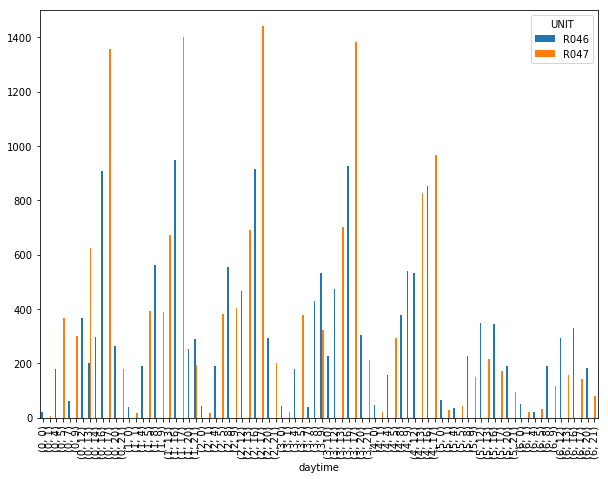

In [145]:
fig = plt.figure(figsize=(10,7.5))
ax = plt.axes()
df_clean.plot(
    kind='bar',
    ax=ax,
    ylim=(0, 1500)
);
# plt.tight_layout()
# fig.savefig('entries_gct_hour.pdf')

In [ ]:
# df_clean['DATETIME'] = ts['DATETIME'].apply(lambda L: pd.datetime(L.year, L.month, L.day, L.hour))

In [182]:
r001 = r001[['daytime','d_entries','d_exits']]
r001.head(50)

,daytime,d_entries,d_exits
10013,"(5, 1)",14.0,34.0
10014,"(5, 5)",25.0,259.0
10015,"(5, 9)",133.0,605.0
10016,"(5, 13)",349.0,452.0
10017,"(5, 17)",308.0,227.0
10018,"(5, 21)",72.0,108.0
10019,"(6, 1)",10.0,21.0
10020,"(6, 5)",16.0,123.0
10021,"(6, 9)",111.0,371.0
10022,"(6, 13)",193.0,390.0


In [148]:
# r001group = r001.groupby(['day','TIME']).mean()
# r001group.head()

In [198]:
mask_e = (r001.d_entries < 5000) & (0 < r001.d_entries)
r001_noout = r001[mask_e]
# r001_noout.d_entries.max()
# r001_noout.d_entries.min()
# r001_noout.d_exits.max()
# r001_noout.d_exits.min()
r001_noout.head(1000)

,daytime,d_entries,d_exits
10013,"(5, 1)",14.0,34.0
10014,"(5, 5)",25.0,259.0
10015,"(5, 9)",133.0,605.0
10016,"(5, 13)",349.0,452.0
10017,"(5, 17)",308.0,227.0
10018,"(5, 21)",72.0,108.0
10019,"(6, 1)",10.0,21.0
10020,"(6, 5)",16.0,123.0
10021,"(6, 9)",111.0,371.0
10022,"(6, 13)",193.0,390.0


In [184]:
r001_noout.d_entries.min()

-116394644.0

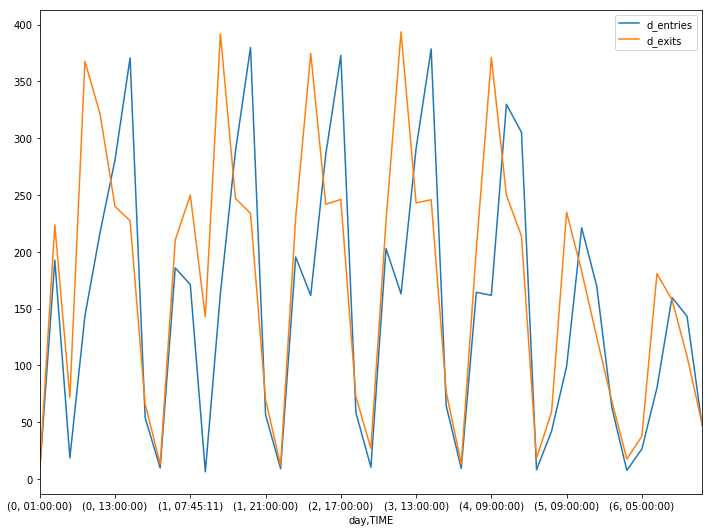

In [199]:
import matplotlib.pyplot as plt

# colors = {'5':'#42ebf4','6':'#42ebf4','1':'#f47e3a','2':'#f47e3a','3':'#f47e3a','4':'#f47e3a'}
fig = plt.figure(figsize=(10,7.5))
ax = plt.axes()
r001group.plot(
    kind='line',
    ax=ax
#     color=r001group[['day','TIME']].map(colors)
);
plt.tight_layout()
# fig.savefig('morningVevening_hour.pdf')

In [94]:
# r001group.unstack(level=0).plot(figsize=(20,15), kind='bar', subplots=True);

In [ ]:
df.plot(
    x=None,
    y=None,
    kind='barh',
    ax=None,
    subplots=True,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title='South Ferry Station entries',
    grid=None,
    legend=True,
    style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)






KeyError: '0'

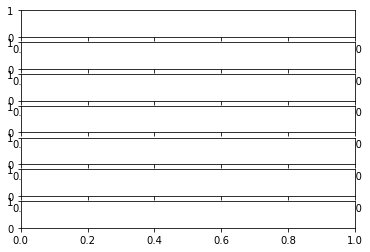

In [96]:
f, a = plt.subplots(7,1)
df.xs('0').plot(kind='bar')
df.xs('1').plot(kind='bar')
df.xs('2').plot(kind='bar')
df.xs('3').plot(kind='bar')
df.xs('4').plot(kind='bar')
df.xs('5').plot(kind='bar')
df.xs('6').plot(kind='bar')

KeyError: 0

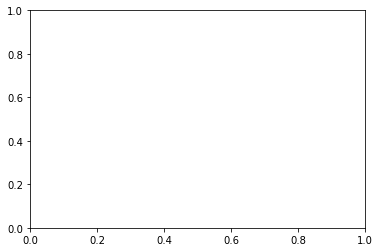

In [41]:
timeday = r001
entries = r001.d_entries

plt.bar(timeday,
        entries,
        color='green',
        edgecolor='none',
        width=0.5,
        align='center',
        label='south ferry')
plt.xticks(timeday);

TypeError: 'AxesSubplot' object does not support indexing

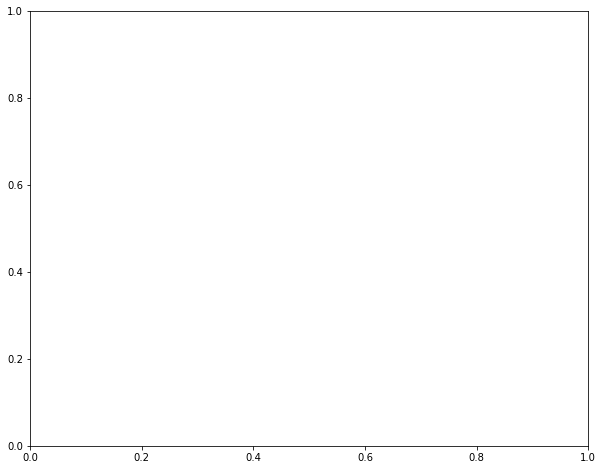

In [38]:
fig, ax = plt.bar(1, 1, figsize=(10, 8))  # 2 Rows, 1 Col

ax[0].hist(r001)
ax[0].set_title('dist1')

# ax[1].scatter(dist2, dist1)
# ax[1].set_xlabel('dist2')
# ax[1].set_ylabel('dist1')
# ax[1].set_title('Scatter Plot');

In [ ]:
fig, ax = plt.subplots()

index = np.arange(n)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}
r1 = ax.bar(index, m1, bar_width,
                 alpha=opacity,
                 color='b',

                 error_kw=error_config)

r2 = ax.bar(index + bar_width, m2, bar_width,
                 alpha=opacity,
                 color='r',

                 error_kw=error_config)

r3 = ax.bar(index + bar_width+ bar_width, m3, bar_width,
                 alpha=opacity,
                 color='y',
                 error_kw=error_config)
r4 = ax.bar(index + bar_width+ bar_width+ bar_width, m4, bar_width,
                 alpha=opacity,
                 color='c',
                 error_kw=error_config)                 
plt.xlabel('D')
plt.ylabel('Anz')
plt.title('Th')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.bar(x,m1, 0.2) % thickness=0.2
ax2.bar(x,m2, 0.2)
ax3.plot(x,m3)
ax4.plot(x,m4)

plt.tight_layout()
plt.show()

In [5]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import datetime

# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    file = "turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = file.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

week_nums = [160806, 160813, 160820, 160827]
df = get_data(week_nums)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

df.head(25)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844
5,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,20:00:00,REGULAR,5761524,1953886
6,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,00:00:00,REGULAR,5761691,1953917
7,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,04:00:00,REGULAR,5761733,1953925
8,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,08:00:00,REGULAR,5761748,1953944
9,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,12:00:00,REGULAR,5761841,1954030


In [6]:
df.rename(columns=lambda x: x.strip(), inplace="TRUE")

In [7]:
df['datetime'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format="%m/%d/%Y %H:%M:%S")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00


In [8]:
df['day'] = df['datetime'].dt.dayofweek
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5


In [9]:
df['d_entries']= df['ENTRIES'].shift(-1) - df['ENTRIES']
df['d_exits']= df['EXITS'].shift(-1) - df['EXITS']
df.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,20:00:00,REGULAR,5761524,1953886,2016-07-30 20:00:00,5,167.0,31.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,00:00:00,REGULAR,5761691,1953917,2016-07-31 00:00:00,6,42.0,8.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,04:00:00,REGULAR,5761733,1953925,2016-07-31 04:00:00,6,15.0,19.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,08:00:00,REGULAR,5761748,1953944,2016-07-31 08:00:00,6,93.0,86.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,12:00:00,REGULAR,5761841,1954030,2016-07-31 12:00:00,6,188.0,60.0


In [181]:
r001 = df[df.UNIT == 'R001']
r001.head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean,daytime
10013,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,01:00:00,REGULAR,738545,1640036,2016-07-30 01:00:00,5,14.0,34.0,"(5, 01:00:00)",1,"(5, 1)"
10014,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,05:00:00,REGULAR,738559,1640070,2016-07-30 05:00:00,5,25.0,259.0,"(5, 05:00:00)",5,"(5, 5)"
10015,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,09:00:00,REGULAR,738584,1640329,2016-07-30 09:00:00,5,133.0,605.0,"(5, 09:00:00)",9,"(5, 9)"
10016,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,13:00:00,REGULAR,738717,1640934,2016-07-30 13:00:00,5,349.0,452.0,"(5, 13:00:00)",13,"(5, 13)"
10017,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,17:00:00,REGULAR,739066,1641386,2016-07-30 17:00:00,5,308.0,227.0,"(5, 17:00:00)",17,"(5, 17)"
10018,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/30/2016,21:00:00,REGULAR,739374,1641613,2016-07-30 21:00:00,5,72.0,108.0,"(5, 21:00:00)",21,"(5, 21)"
10019,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/31/2016,01:00:00,REGULAR,739446,1641721,2016-07-31 01:00:00,6,10.0,21.0,"(6, 01:00:00)",1,"(6, 1)"
10020,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/31/2016,05:00:00,REGULAR,739456,1641742,2016-07-31 05:00:00,6,16.0,123.0,"(6, 05:00:00)",5,"(6, 5)"
10021,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/31/2016,09:00:00,REGULAR,739472,1641865,2016-07-31 09:00:00,6,111.0,371.0,"(6, 09:00:00)",9,"(6, 9)"
10022,A058,R001,01-00-00,WHITEHALL S-FRY,R1,BMT,07/31/2016,13:00:00,REGULAR,739583,1642236,2016-07-31 13:00:00,6,193.0,390.0,"(6, 13:00:00)",13,"(6, 13)"


In [38]:
df.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0


In [125]:
df['time_clean'] = df['TIME']
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)",00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)",04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)",08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)",12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)",16:00:00


In [126]:
df.time_clean = df.time_clean.str.split(':')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)","[00, 00, 00]"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)","[04, 00, 00]"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)","[08, 00, 00]"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)","[12, 00, 00]"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)","[16, 00, 00]"


In [127]:
df['time_clean'] = df['time_clean'].apply(lambda x: int(x[0]))
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)",0
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)",4
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)",8
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)",12
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)",16


In [131]:
df['daytime'] = list(zip(df.day, df.time_clean))
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean,daytime
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)",0,"(5, 0)"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)",4,"(5, 4)"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)",8,"(5, 8)"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)",12,"(5, 12)"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)",16,"(5, 16)"


In [130]:
df['day_TIME'] = list(zip(df.day, df.TIME))
df.head(1000)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,day,d_entries,d_exits,day_TIME,time_clean,daytime
0,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,00:00:00,REGULAR,5760764,1953626,2016-07-30 00:00:00,5,50.0,11.0,"(5, 00:00:00)",0,"(5, 00:00:00)"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,04:00:00,REGULAR,5760814,1953637,2016-07-30 04:00:00,5,28.0,37.0,"(5, 04:00:00)",4,"(5, 04:00:00)"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,08:00:00,REGULAR,5760842,1953674,2016-07-30 08:00:00,5,129.0,109.0,"(5, 08:00:00)",8,"(5, 08:00:00)"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,12:00:00,REGULAR,5760971,1953783,2016-07-30 12:00:00,5,225.0,61.0,"(5, 12:00:00)",12,"(5, 12:00:00)"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,16:00:00,REGULAR,5761196,1953844,2016-07-30 16:00:00,5,328.0,42.0,"(5, 16:00:00)",16,"(5, 16:00:00)"
5,A002,R051,02-00-00,59 ST,NQR456,BMT,07/30/2016,20:00:00,REGULAR,5761524,1953886,2016-07-30 20:00:00,5,167.0,31.0,"(5, 20:00:00)",20,"(5, 20:00:00)"
6,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,00:00:00,REGULAR,5761691,1953917,2016-07-31 00:00:00,6,42.0,8.0,"(6, 00:00:00)",0,"(6, 00:00:00)"
7,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,04:00:00,REGULAR,5761733,1953925,2016-07-31 04:00:00,6,15.0,19.0,"(6, 04:00:00)",4,"(6, 04:00:00)"
8,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,08:00:00,REGULAR,5761748,1953944,2016-07-31 08:00:00,6,93.0,86.0,"(6, 08:00:00)",8,"(6, 08:00:00)"
9,A002,R051,02-00-00,59 ST,NQR456,BMT,07/31/2016,12:00:00,REGULAR,5761841,1954030,2016-07-31 12:00:00,6,188.0,60.0,"(6, 12:00:00)",12,"(6, 12:00:00)"


In [135]:
# df_units = df[['UNIT','day_TIME','d_entries']].pivot_table(values='d_entries',columns='UNIT',index='day_TIME')
df_units = df[['UNIT','daytime','d_entries','d_exits']].pivot_table(values='d_entries',columns='UNIT',index='daytime')
df_units.head(1000)

UNIT,R001,R003,R004,R005,R006,R007,R008,R009,R010,R011,R012,R013,R014,R015,R016,R017,R018,R019,R020,R021,R022,R023,R024,R025,R027,R028,R029,R030,R031,R032,R033,R034,R035,R036,R037,R038,R039,R040,R041,R042,R043,R044,R045,R046,R047,R048,R049,R050,R051,R052,R053,R054,R055,R056,R057,R058,R059,R060,R061,R062,R063,R064,R065,R066,R067,R068,R069,R070,R072,R079,R080,R081,R082,R083,R084,R085,R086,R087,R088,R089,R090,R091,R092,R093,R094,R095,R096,R097,R098,R099,R100,R101,R102,R103,R104,R105,R106,R107,R108,R109,R110,R111,R112,R113,R114,R115,R116,R117,R118,R119,R120,R121,R122,R123,R124,R125,R126,R127,R128,R129,R130,R131,R132,R133,R134,R135,R136,R137,R138,R139,R140,R141,R142,R143,R144,R145,R146,R147,R148,R149,R150,R151,R152,R153,R154,R155,R156,R157,R158,R159,R160,R161,R162,R163,R164,R165,R166,R167,R168,R169,R170,R171,R172,R173,R174,R175,R176,R177,R178,R179,R180,R181,R182,R183,R184,R185,R186,R187,R188,R189,R190,R191,R192,R193,R194,R195,R196,R197,R198,R199,R200,R201,R202,R203,R204,R205,R206,R207,R208,R209,R210,R211,R212,R213,R214,R215,R216,R217,R218,R219,R220,R221,R222,R223,R224,R225,R226,R227,R228,R229,R230,R231,R232,R233,R234,R235,R236,R237,R238,R239,R240,R241,R242,R243,R244,R245,R246,R247,R248,R249,R250,R251,R252,R253,R254,R255,R256,R257,R258,R259,R260,R261,R262,R263,R264,R265,R266,R267,R268,R269,R270,R271,R272,R273,R274,R275,R276,R277,R278,R279,R280,R281,R282,R283,R284,R285,R286,R287,R288,R289,R290,R291,R292,R293,R294,R295,R296,R297,R298,R299,R300,R301,R302,R303,R304,R306,R307,R308,R309,R310,R311,R312,R313,R314,R315,R316,R317,R318,R319,R320,R321,R322,R323,R324,R325,R326,R327,R328,R329,R330,R331,R332,R333,R334,R335,R336,R337,R338,R339,R340,R341,R342,R343,R344,R345,R346,R347,R348,R349,R350,R352,R353,R354,R355,R356,R357,R358,R359,R360,R361,R362,R363,R364,R365,R366,R367,R368,R369,R370,R371,R372,R373,R374,R375,R376,R377,R378,R379,R380,R381,R382,R383,R384,R385,R386,R387,R388,R389,R390,R391,R392,R393,R394,R395,R396,R397,R398,R399,R400,R401,R402,R403,R404,R405,R406,R407,R408,R409,R411,R412,R413,R414,R415,R416,R417,R418,R419,R420,R421,R422,R423,R424,R425,R426,R427,R428,R429,R430,R431,R432,R433,R434,R435,R436,R437,R438,R439,R440,R441,R442,R443,R444,R445,R446,R447,R448,R449,R450,R451,R452,R453,R454,R455,R456,R459,R460,R461,R462,R463,R464,R468,R469,R535,R536,R541,R542,R543,R544,R545,R546,R547,R548,R549,R550,R551,R552
daytime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 0)",NaN,6.500000,11.15,12.6875,10.09375,7.875,10.2500,10.458333,NaN,18.328125,17.108108,16.000000,NaN,NaN,6.175,3.284091,80.433962,8.320000,20.013889,38.698795,31.833333,20.035714,50.365385,23.654762,4.022727,NaN,6.818750,8.078125,17.743902,16.572917,104.846154,21.45,14.3875,25.000000,21.833333,7.625,12.75,11.350,4.956522,7.208333,NaN,7.258333,NaN,2.219130e+01,NaN,NaN,10.000000,15.486111,20.490385,26.250000,13.450000,10.512821,22.435185,11.700,12.157068,3.37500,11.4375,7.375000,18.250000,19.802817,29.833333,0.0,14.125000,10.00,0.0,13.5625,31.500000,6.528846,6.338028,NaN,12.678571,24.579545,18.555556,14.839286,23.493902,29.812500,17.200,2.805556,NaN,1.527778,20.666667,18.7500,18.041667,22.500000,17.964286,17.31250,24.875,22.229167,13.035714,12.892857,2.500000,34.388889,32.468750,37.892857,20.03125,30.150000,12.785714,20.500000,9.046296,NaN,NaN,16.716667,15.275000,NaN,7.590909,5.400000,24.291667,15.6875,NaN,31.666667,17.875000,38.083333,22.388889,6.96875,16.916667,NaN,5.015625,13.268519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.211538,NaN,6.947368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.065217,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [133]:
# df_units.head(1000)

In [136]:
df_units = df_units[['R046','R047']]
df_clean = df_units.dropna(axis=0, how='all')
df_clean.head(1000)

UNIT,R046,R047
daytime,,
"(0, 0)",2.219130e+01,NaN
"(0, 1)",NaN,7.916667
"(0, 4)",1.785739e+02,NaN
"(0, 5)",NaN,367.200000
"(0, 7)",6.207143e+01,NaN
"(0, 8)",-1.309216e+07,17.066667
"(0, 9)",NaN,300.253521
"(0, 12)",3.651842e+02,NaN
"(0, 13)",2.013571e+02,625.033333


In [140]:
mask1 = df_clean.R046 != df_clean.R046.min()
df_clean = df_clean[mask1]
df_clean.R046.min()

21.704347826086956

In [141]:
mask2 = df_clean.R046 != df_clean.R046.max()
df_clean = df_clean[mask2]
df_clean.R046.max()

947.98245614035091

In [142]:
mask3 = df_clean.R047 != df_clean.R047.max()
df_clean = df_clean[mask3]
df_clean.R047.max()

1441.2333333333333

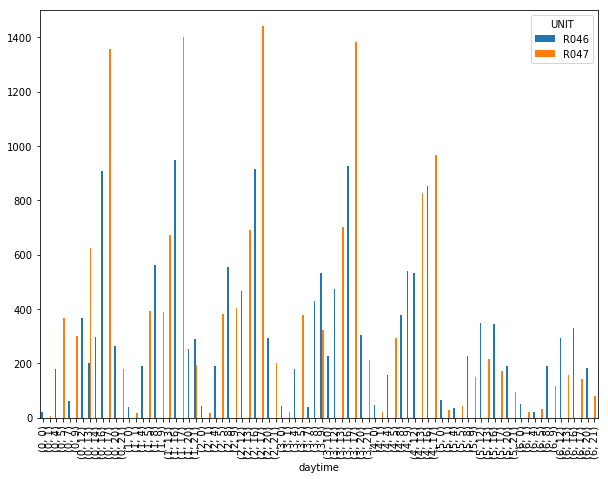

In [145]:
fig = plt.figure(figsize=(10,7.5))
ax = plt.axes()
df_clean.plot(
    kind='bar',
    ax=ax,
    ylim=(0, 1500)
);
# plt.tight_layout()
# fig.savefig('entries_gct_hour.pdf')

In [ ]:
# df_clean['DATETIME'] = ts['DATETIME'].apply(lambda L: pd.datetime(L.year, L.month, L.day, L.hour))

In [182]:
r001 = r001[['daytime','d_entries','d_exits']]
r001.head(50)

,daytime,d_entries,d_exits
10013,"(5, 1)",14.0,34.0
10014,"(5, 5)",25.0,259.0
10015,"(5, 9)",133.0,605.0
10016,"(5, 13)",349.0,452.0
10017,"(5, 17)",308.0,227.0
10018,"(5, 21)",72.0,108.0
10019,"(6, 1)",10.0,21.0
10020,"(6, 5)",16.0,123.0
10021,"(6, 9)",111.0,371.0
10022,"(6, 13)",193.0,390.0


In [148]:
# r001group = r001.groupby(['day','TIME']).mean()
# r001group.head()

In [198]:
mask_e = (r001.d_entries < 5000) & (0 < r001.d_entries)
r001_noout = r001[mask_e]
# r001_noout.d_entries.max()
# r001_noout.d_entries.min()
# r001_noout.d_exits.max()
# r001_noout.d_exits.min()
r001_noout.head(1000)

,daytime,d_entries,d_exits
10013,"(5, 1)",14.0,34.0
10014,"(5, 5)",25.0,259.0
10015,"(5, 9)",133.0,605.0
10016,"(5, 13)",349.0,452.0
10017,"(5, 17)",308.0,227.0
10018,"(5, 21)",72.0,108.0
10019,"(6, 1)",10.0,21.0
10020,"(6, 5)",16.0,123.0
10021,"(6, 9)",111.0,371.0
10022,"(6, 13)",193.0,390.0


In [184]:
r001_noout.d_entries.min()

-116394644.0

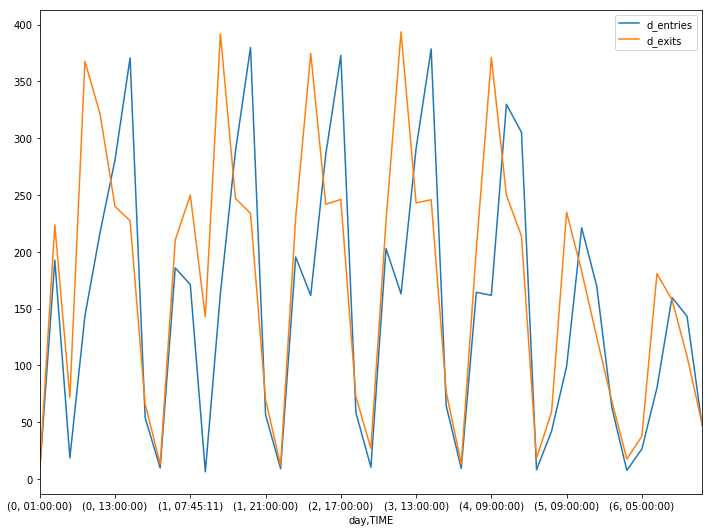

In [199]:
import matplotlib.pyplot as plt

# colors = {'5':'#42ebf4','6':'#42ebf4','1':'#f47e3a','2':'#f47e3a','3':'#f47e3a','4':'#f47e3a'}
fig = plt.figure(figsize=(10,7.5))
ax = plt.axes()
r001group.plot(
    kind='line',
    ax=ax
#     color=r001group[['day','TIME']].map(colors)
);
plt.tight_layout()
# fig.savefig('morningVevening_hour.pdf')

In [94]:
# r001group.unstack(level=0).plot(figsize=(20,15), kind='bar', subplots=True);

In [ ]:
df.plot(
    x=None,
    y=None,
    kind='barh',
    ax=None,
    subplots=True,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title='South Ferry Station entries',
    grid=None,
    legend=True,
    style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)






KeyError: '0'

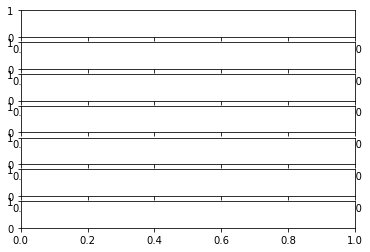

In [96]:
f, a = plt.subplots(7,1)
df.xs('0').plot(kind='bar')
df.xs('1').plot(kind='bar')
df.xs('2').plot(kind='bar')
df.xs('3').plot(kind='bar')
df.xs('4').plot(kind='bar')
df.xs('5').plot(kind='bar')
df.xs('6').plot(kind='bar')

KeyError: 0

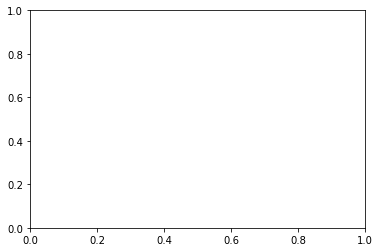

In [41]:
timeday = r001
entries = r001.d_entries

plt.bar(timeday,
        entries,
        color='green',
        edgecolor='none',
        width=0.5,
        align='center',
        label='south ferry')
plt.xticks(timeday);

TypeError: 'AxesSubplot' object does not support indexing

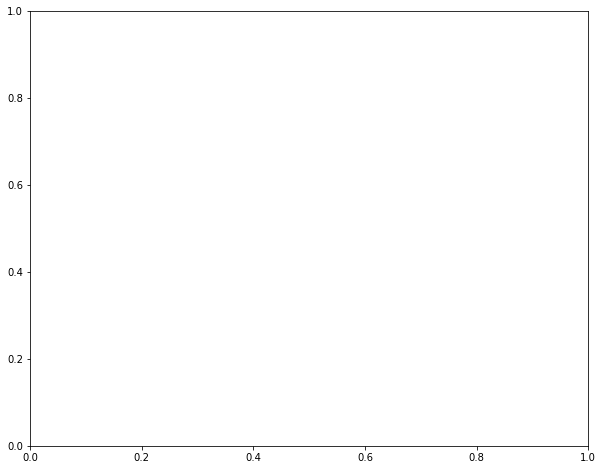

In [38]:
fig, ax = plt.bar(1, 1, figsize=(10, 8))  # 2 Rows, 1 Col

ax[0].hist(r001)
ax[0].set_title('dist1')

# ax[1].scatter(dist2, dist1)
# ax[1].set_xlabel('dist2')
# ax[1].set_ylabel('dist1')
# ax[1].set_title('Scatter Plot');

In [ ]:
fig, ax = plt.subplots()

index = np.arange(n)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}
r1 = ax.bar(index, m1, bar_width,
                 alpha=opacity,
                 color='b',

                 error_kw=error_config)

r2 = ax.bar(index + bar_width, m2, bar_width,
                 alpha=opacity,
                 color='r',

                 error_kw=error_config)

r3 = ax.bar(index + bar_width+ bar_width, m3, bar_width,
                 alpha=opacity,
                 color='y',
                 error_kw=error_config)
r4 = ax.bar(index + bar_width+ bar_width+ bar_width, m4, bar_width,
                 alpha=opacity,
                 color='c',
                 error_kw=error_config)                 
plt.xlabel('D')
plt.ylabel('Anz')
plt.title('Th')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.bar(x,m1, 0.2) % thickness=0.2
ax2.bar(x,m2, 0.2)
ax3.plot(x,m3)
ax4.plot(x,m4)

plt.tight_layout()
plt.show()